In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.linear_model as ml
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("bensin2.csv")
data.describe()

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,26.446154,2.384615,8.538462,49.876923,28.738462,165.307692
std,7.424686,1.558167,13.101857,0.992278,3.378595,68.571113
min,6.000000,1.000000,0.000000,42.000000,18.000000,1.000000
25%,23.000000,1.000000,0.000000,50.000000,29.000000,142.000000
50%,25.000000,2.000000,0.000000,50.000000,30.000000,174.000000
75%,30.000000,4.000000,15.000000,50.000000,30.000000,211.000000
max,45.000000,6.000000,60.000000,50.000000,36.000000,278.000000


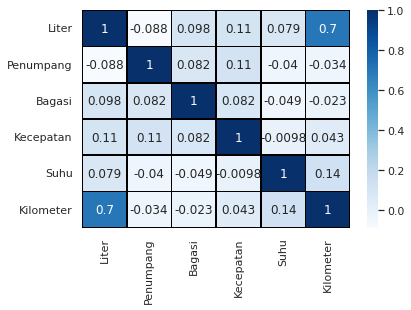

In [3]:
sns.heatmap(data.corr(), annot=True, linecolor="black", linewidths=0.8, cmap="Blues");

In [4]:
data.drop(columns=["Bagasi", "RPM"], inpalce=True)

TypeError: drop() got an unexpected keyword argument 'inpalce'

In [5]:
X = np.array(data.iloc[:, :4])
y = np.array(data["Kilometer"])
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1, random_state=1)
model = ml.LinearRegression()
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(r2)

0.8957725941920919


In [6]:
print(f"Nilai Gradien/Slope = {model.coef_}")
print(f"Nilai Koefisien/Intercept = {model.intercept_}")

Nilai Gradien/Slope = [ 6.7162692   1.30373787 -0.56270057 -2.21981692]
Nilai Koefisien/Intercept = 99.60318878401779


In [9]:
# Formulanya y = mx1 + mx2 +mx3 ... + c
# y = 57.896 = 6.533x1 + 0.720x2 + -2.481x3 + 1.963x4

x1 = np.array([20, 1, 50, 30]).reshape(1, -1) # Nilai Paling Besar di X 
y1 = (6.533*x1[0][0]) + (0.720*x1[0][1]) + (-2.481*x1[0][2]) + (1.963*x1[0][3]) + 57.896
pred = model.predict(x1)
for x in pred:
    pred = x
print(f"Hasil yang dapat di prediksi adalah {int(pred)} Kilometer")

Hasil yang dapat di prediksi adalah 140 Kilometer


[140.50277477]
